# Importing Packages

In [1]:
import dslab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dslab.visualization.visualize import distributions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

C:\Users\John\anaconda3\envs\term120x_env\python.exe
{'numpy': '1.19.1', 'pandas': '1.0.1', 'seaborn': '0.10.0', 'sklearn': '0.22.1', 'matplotlib': '3.1.3'}


In [2]:
df = pd.read_csv('FTIR_Spectra_instant_coffee.csv', index_col = 0)
df_trans=df.transpose()
df2=df_trans.rename({'Wavenumbers':'coffee'}, axis=1)
is_arabica=df2['coffee']=='Arabica'

df3=df2.drop(['Group Code:','coffee'], axis=1)
df3.columns=pd.to_numeric(df3.columns.values)
X=df3.apply(pd.to_numeric)


In [3]:
feat = pd.DataFrame()
    
mini = X.min(axis=1)
mean = X.mean(axis=1)
std = X.std(axis=1)
var = X.var(axis=1)
maxi = X.max(axis=1)
feat.insert(loc=0, column='minimum', value=mini)
feat.insert(loc=1, column='mean', value=mean)
feat.insert(loc=2, column='standard deviation', value=std)
feat.insert(loc=3, column='variance', value=var)
feat.insert(loc=4, column='maximum', value=maxi)


In [4]:
ara_feat = feat.iloc[:29,:]
rob_feat = feat.iloc[29:,:]
rob_feat = rob_feat.reset_index(drop=True)

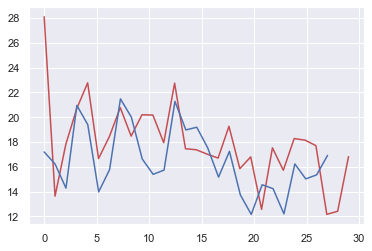

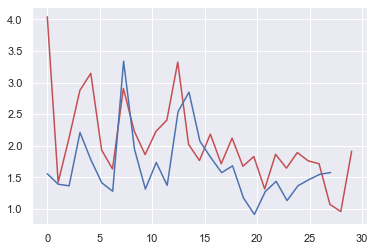

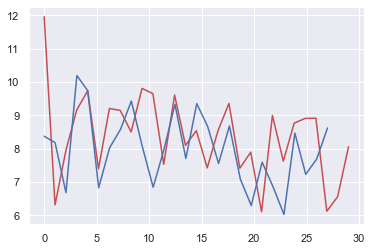

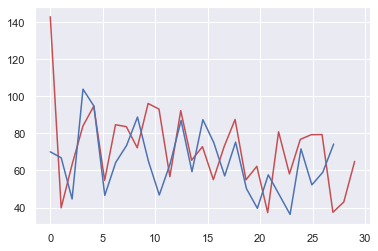

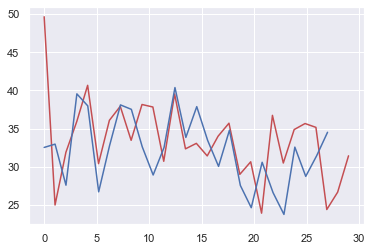

In [5]:
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()

t = np.linspace(0,29,29)
t = np.transpose(t)
t2 = np.linspace(0,27,27)
t2 = np.transpose(t2)
#ax1.plot(y= 'ara_mean')

ax1.plot(t,ara_feat['mean'],'r',label = 'Arabica')
ax1.plot(t2,rob_feat['mean'], 'b',label = 'Robusta')


ax2.plot(t,ara_feat['minimum'],'r',label = 'Arabica')
ax2.plot(t2,rob_feat['minimum'], 'b',label = 'Robusta')

ax3.plot(t,ara_feat['standard deviation'],'r',label = 'Arabica')
ax3.plot(t2,rob_feat['standard deviation'], 'b',label = 'Robusta')

ax4.plot(t,ara_feat['variance'],'r',label = 'Arabica')
ax4.plot(t2,rob_feat['variance'], 'b',label = 'Robusta')

ax5.plot(t,ara_feat['maximum'],'r',label = 'Arabica')
ax5.plot(t2,rob_feat['maximum'], 'b',label = 'Robusta')


(<Figure size 432x288 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x267ef542488>,
  <matplotlib.axes._subplots.AxesSubplot at 0x267ef5b36c8>))

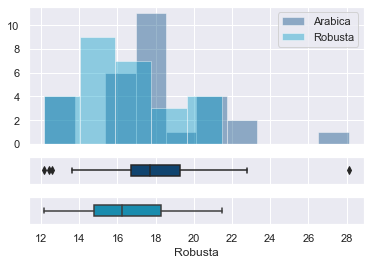

In [6]:
distributions(pd.Series(ara_feat['mean'],name='Arabica'),
              pd.Series(rob_feat['mean'],name='Robusta'),
              both_series=True)

(<Figure size 432x288 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x267ef0aa488>,
  <matplotlib.axes._subplots.AxesSubplot at 0x267ef841b88>))

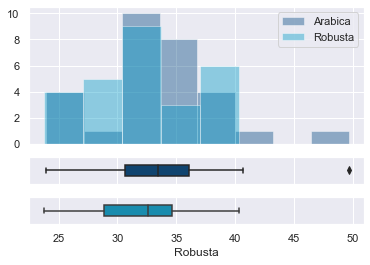

In [7]:
distributions(pd.Series(ara_feat['maximum'],name='Arabica'),
              pd.Series(rob_feat['maximum'],name='Robusta'),
              both_series=True)

(<Figure size 432x288 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x267ef92cb48>,
  <matplotlib.axes._subplots.AxesSubplot at 0x267ef98a448>))

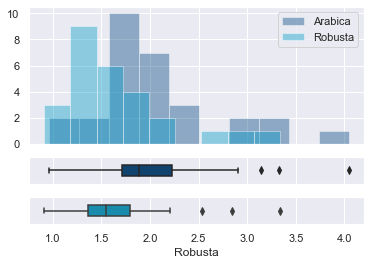

In [8]:
distributions(pd.Series(ara_feat['minimum'],name='Arabica'),
              pd.Series(rob_feat['minimum'],name='Robusta'),
              both_series=True)

(<Figure size 432x288 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x267efa60e08>,
  <matplotlib.axes._subplots.AxesSubplot at 0x267efaec748>))

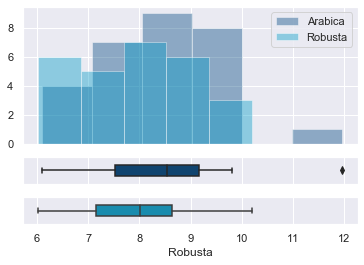

In [9]:
distributions(pd.Series(ara_feat['standard deviation'],name='Arabica'),
              pd.Series(rob_feat['standard deviation'],name='Robusta'),
              both_series=True)

(<Figure size 432x288 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x267efbdf548>,
  <matplotlib.axes._subplots.AxesSubplot at 0x267efc33688>))

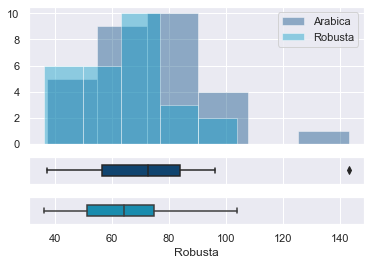

In [10]:
distributions(pd.Series(ara_feat['variance'],name='Arabica'),
              pd.Series(rob_feat['variance'],name='Robusta'),
              both_series=True)

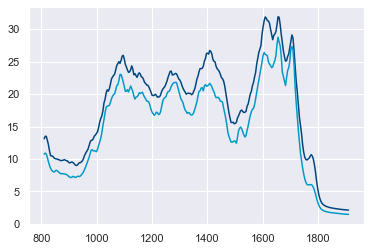

In [11]:
plt.plot(X.columns,X.loc['3'])
plt.plot(X.columns,X.loc['54'])

# Confusion Matrix

In [13]:
y_mean_pred = feat['mean'] > 16.7
mean_cm = confusion_matrix(is_arabica, y_mean_pred)
print(mean_cm)
mean_acc = (mean_cm[0][0]+mean_cm[1][1])/(mean_cm[0][0]+mean_cm[0][1]+mean_cm[1][0]+mean_cm[1][1])
mean_acc

[[16 11]
 [ 7 22]]


0.6785714285714286

In [14]:
y_pred = feat['minimum'] > 2
y_pred = pd.to_numeric(y_pred.values)
y2_pred =feat['mean'] > 16.7
y2_pred = pd.to_numeric(y2_pred.values)
y_comb = []
for i in range(len(y_pred)):
    if y_pred[i] ==True and y2_pred[i] == True:
        y_comb.append(True)
    else:
        y_comb.append(False)
print(y_pred)
print(y2_pred)
print(y_comb)        
        
mean_cm = confusion_matrix(is_arabica, y_comb)
print(mean_cm)
mean_acc = (mean_cm[0][0]+mean_cm[1][1])/(mean_cm[0][0]+mean_cm[0][1]+mean_cm[1][0]+mean_cm[1][1])
mean_acc

[ True False  True  True  True False False  True  True False  True  True
  True  True False  True False  True False False False False False False
 False False False False False False False False  True False False False
  True False False False False  True  True  True False False False False
 False False False False False False False False]
[ True False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True False  True
  True  True False False  True  True False False  True  True False False
  True  True False False False  True  True  True  True False  True False
 False False False False False False False  True]
[True, False, True, True, True, False, False, True, True, False, True, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, True, True, False, False, False, Fal

0.6071428571428571

In [15]:
y_mean_pred = feat['mean'] > 16.7
mean_cm = confusion_matrix(is_arabica, y_pred)
print(mean_cm)
mean_acc = (mean_cm[0][0]+mean_cm[1][1])/(mean_cm[0][0]+mean_cm[0][1]+mean_cm[1][0]+mean_cm[1][1])
mean_acc

[[22  5]
 [17 12]]


0.6071428571428571

In [16]:
y_pred = feat['mean'] > 16.7
mean_cm = confusion_matrix(is_arabica, y_pred)
print(mean_cm)
mean_acc = (mean_cm[0][0]+mean_cm[1][1])/(mean_cm[0][0]+mean_cm[0][1]+mean_cm[1][0]+mean_cm[1][1])
mean_acc

[[16 11]
 [ 7 22]]


0.6785714285714286

In [17]:
y_pred = feat['mean'] > 16.7 & feat['minimum'] > 8
mean_cm = confusion_matrix(is_arabica, y_mean_pred)
print(mean_cm)
mean_acc = (mean_cm[0][0]+mean_cm[1][1])/(mean_cm[0][0]+mean_cm[0][1]+mean_cm[1][0]+mean_cm[1][1])
mean_acc

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]